# Hackaton - Binary Growth Classification 

## EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score, classification_report

sns.set()

In [ ]:
df = pd.read_csv("/content/plant_growth_data.csv")

df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [ ]:
df.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


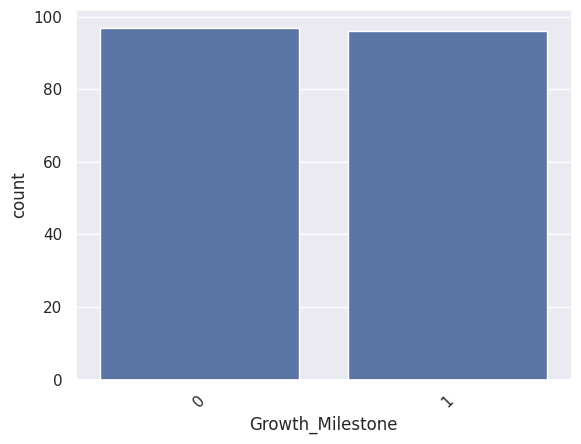

In [ ]:
sns.countplot(x='Growth_Milestone', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Print possible categorical data
print(df['Soil_Type'].unique(), df['Soil_Type'].value_counts())
print(df['Water_Frequency'].unique(), df['Water_Frequency'].value_counts())
print(df['Fertilizer_Type'].unique(), df['Fertilizer_Type'].value_counts())

['loam' 'sandy' 'clay'] Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64
['bi-weekly' 'weekly' 'daily'] Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64
['chemical' 'organic' 'none'] Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64


In [ ]:
# Transform categorical data into numerical

one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(df['Soil_Type'].values.reshape(-1, 1)).todense()
column_names = one_hot_encoder.get_feature_names_out(['Soil_Type'])
encoded_df = pd.DataFrame(encoded_data, columns=column_names, index=df.index)
df = pd.concat([df, encoded_df], axis=1)

one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(df['Water_Frequency'].values.reshape(-1, 1)).todense()
column_names = one_hot_encoder.get_feature_names_out(['Water_Frequency'])
encoded_df = pd.DataFrame(encoded_data, columns=column_names, index=df.index)
df = pd.concat([df, encoded_df], axis=1)

one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(df['Fertilizer_Type'].values.reshape(-1, 1)).todense()
column_names = one_hot_encoder.get_feature_names_out(['Fertilizer_Type'])
encoded_df = pd.DataFrame(encoded_data, columns=column_names, index=df.index)
df = pd.concat([df, encoded_df], axis=1)

df.drop(['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'], axis=1, inplace=True)

print(df.head())
print(df.columns)

   Sunlight_Hours  Temperature   Humidity  Growth_Milestone  Soil_Type_clay  \
0        5.192294    31.719602  61.591861                 0             0.0   
1        4.033133    28.919484  52.422276                 1             0.0   
2        8.892769    23.179059  44.660539                 0             0.0   
3        8.241144    18.465886  46.433227                 0             0.0   
4        8.374043    18.128741  63.625923                 0             0.0   

   Soil_Type_loam  Soil_Type_sandy  Water_Frequency_bi-weekly  \
0             1.0              0.0                        1.0   
1             0.0              1.0                        0.0   
2             1.0              0.0                        1.0   
3             1.0              0.0                        1.0   
4             0.0              1.0                        1.0   

   Water_Frequency_daily  Water_Frequency_weekly  Fertilizer_Type_chemical  \
0                    0.0                     0.0        

<Axes: >

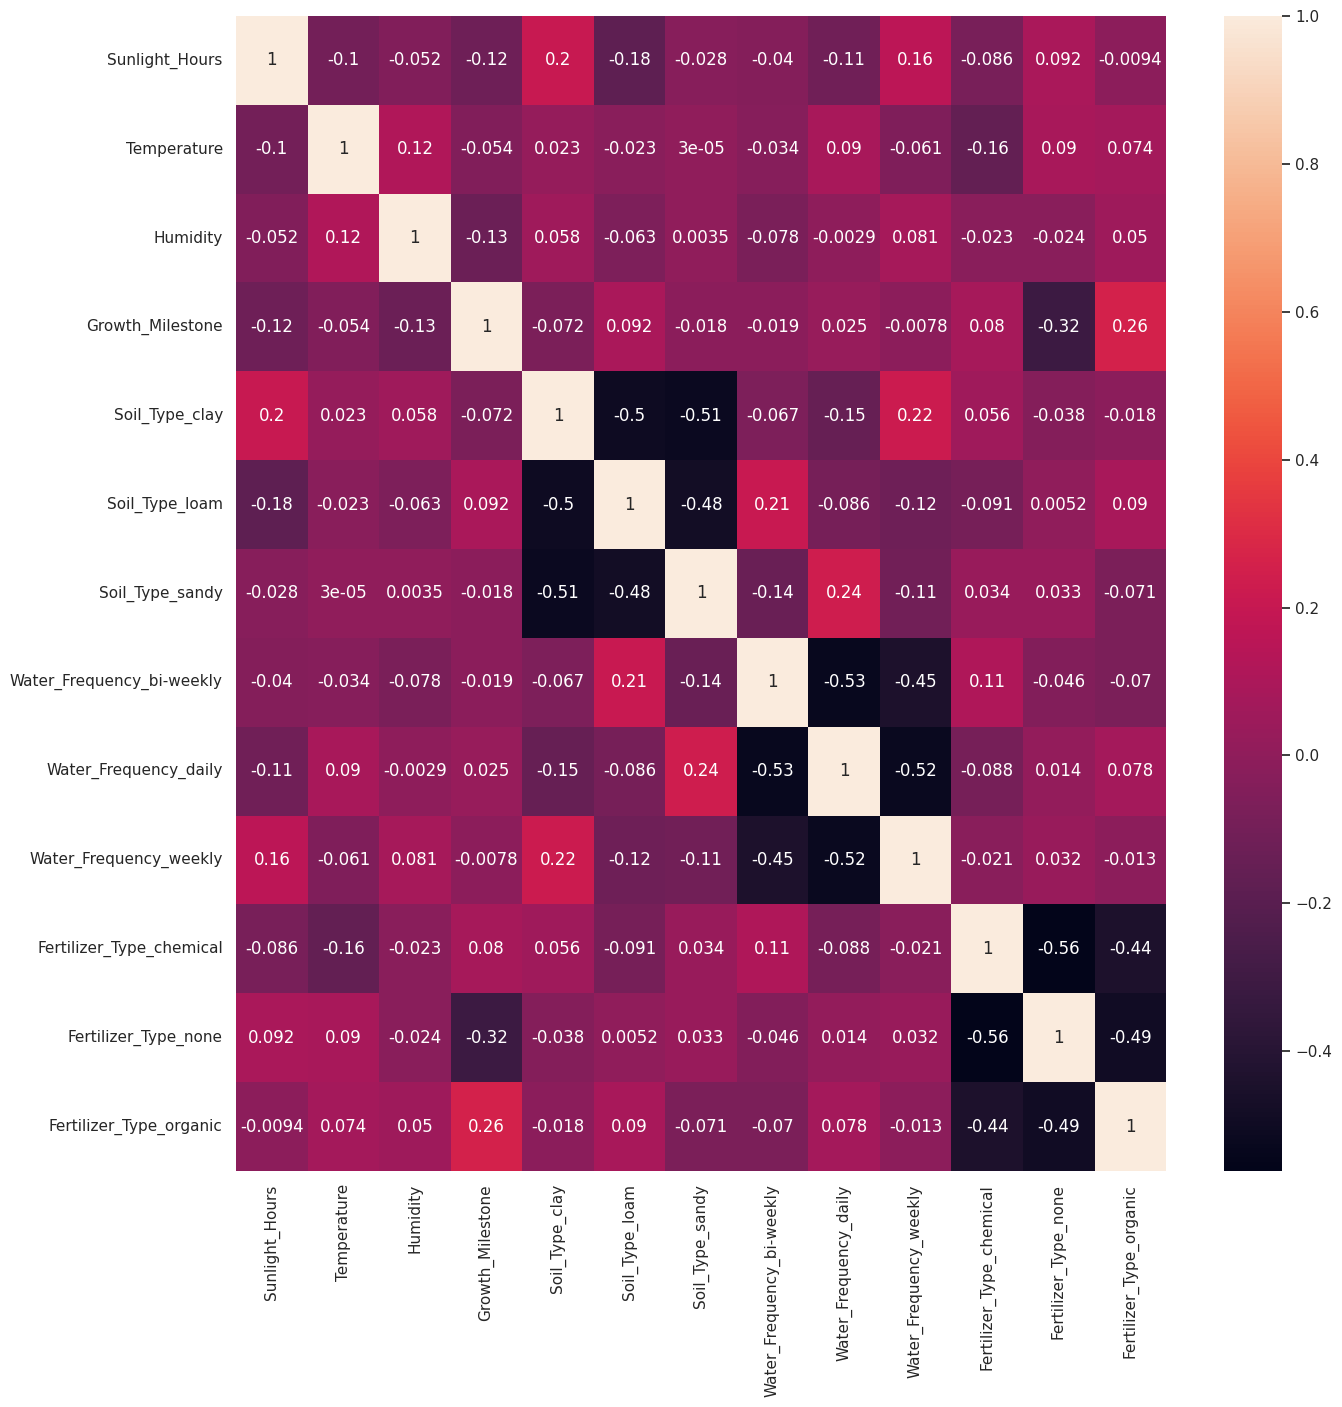

In [ ]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.drop("Growth_Milestone", axis=1)
y = df["Growth_Milestone"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

## Regresión Logística

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'ovr - liblinear'),
  Text(1, 0, 'ovr - newton-cg'),
  Text(2, 0, 'ovr - lbfgs'),
  Text(3, 0, 'ovr - sag'),
  Text(4, 0, 'ovr - saga'),
  Text(5, 0, 'multinomial - newton-cg'),
  Text(6, 0, 'multinomial - lbfgs'),
  Text(7, 0, 'multinomial - sag'),
  Text(8, 0, 'multinomial - saga')])

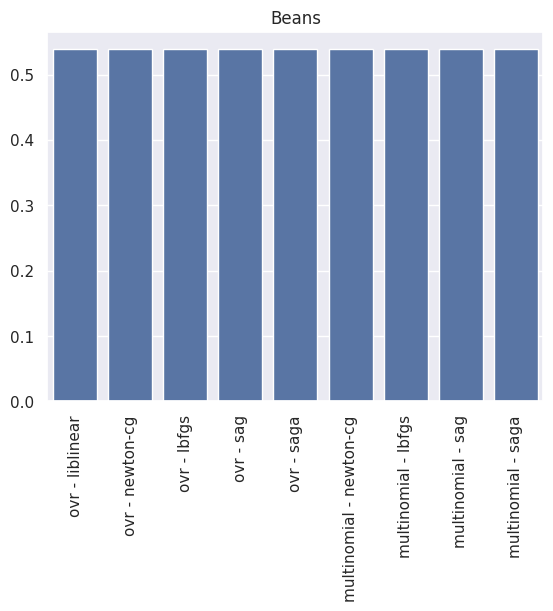

In [ ]:
multiclass = ["ovr", "multinomial"]
solver_list = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]

scores = []
params = []

for class_m in multiclass:
    for solver_m in solver_list:
        try:
            model = LogisticRegression(random_state=0, solver=solver_m, multi_class=class_m)

            model.fit(X_train, y_train)

            data_pred = model.predict(X_test)

            params.append(class_m + " - " + solver_m)

            acc = accuracy_score(y_test, data_pred)

            scores.append(acc)
        except:
            continue

sns.barplot(x=params, y=scores).set_title('Beans')
plt.xticks(rotation=90)

## Desicion Tree

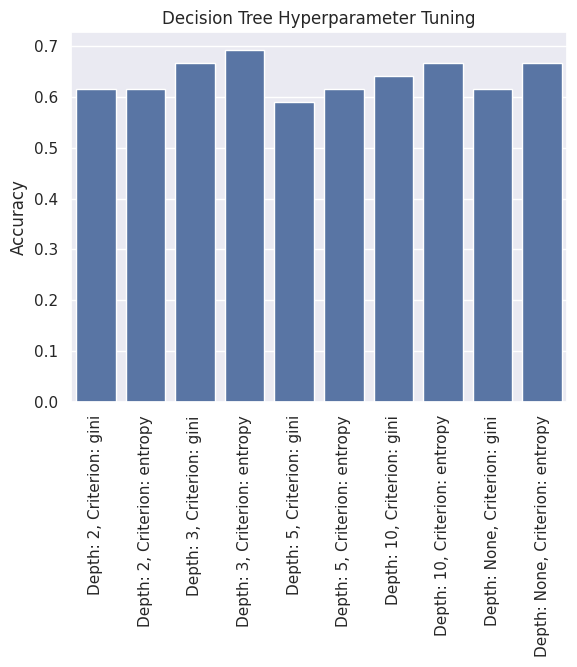

In [ ]:
# Define hyperparameter options
max_depth_list = [2, 3, 5, 10, None]
criteria_list = ["gini", "entropy"]

# Lists to store results
scores = []
params = []

# Iterate over hyperparameters
for depth in max_depth_list:
    for criterion in criteria_list:
        try:
            # Define the model with current hyperparameters
            tree = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=0)

            # Train the model
            tree.fit(X_train, y_train)

            # Predict on the test set
            y_test_pred = tree.predict(X_test)

            # Store parameters and accuracy
            params.append(f"Depth: {depth}, Criterion: {criterion}")
            acc = accuracy_score(y_test, y_test_pred)
            scores.append(acc)
        except:
            continue

# Visualize the results
sns.barplot(x=params, y=scores).set_title('Decision Tree Hyperparameter Tuning')
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

## Random forest

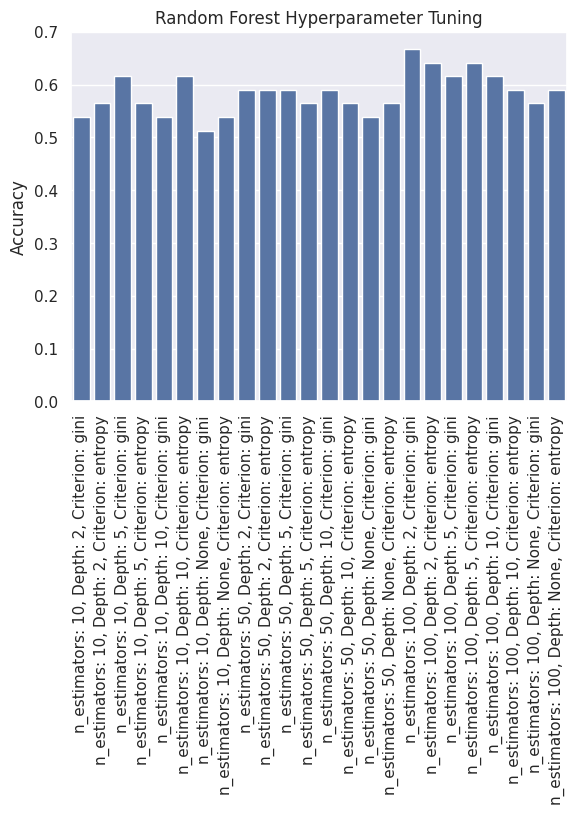

In [ ]:
n_estimators_list = [10, 50, 100]
max_depth_list = [2, 5, 10, None]
criteria_list = ["gini", "entropy"]

# Lists to store results
scores = []
params = []

# Iterate over hyperparameters
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for criterion in criteria_list:
            try:
                # Define the model with current hyperparameters
                random_forest = RandomForestClassifier(
                    n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, random_state=0
                )

                # Train the model
                random_forest.fit(X_train, y_train)

                # Predict on the test set
                y_test_pred = random_forest.predict(X_test)

                # Store parameters and accuracy
                params.append(f"n_estimators: {n_estimators}, Depth: {max_depth}, Criterion: {criterion}")
                acc = accuracy_score(y_test, y_test_pred)
                scores.append(acc)
            except Exception as e:
                print(f"Error with params: n_estimators={n_estimators}, max_depth={max_depth}, criterion={criterion}")
                print(e)
                continue

# Visualize the results
sns.barplot(x=params, y=scores).set_title('Random Forest Hyperparameter Tuning')
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [ ]:
import joblib

random_forcest = RandomForestClassifier(n_estimators=50, max_depth=2, criterion="entropy", random_state=0)

# Train the model
random_forcest.fit(X_train, y_train)

# Save the trained model
joblib.dump(random_forcest, '../backend/machine/models/random_forest_model.pkl')

['random_forest_model.pkl']

## KNN

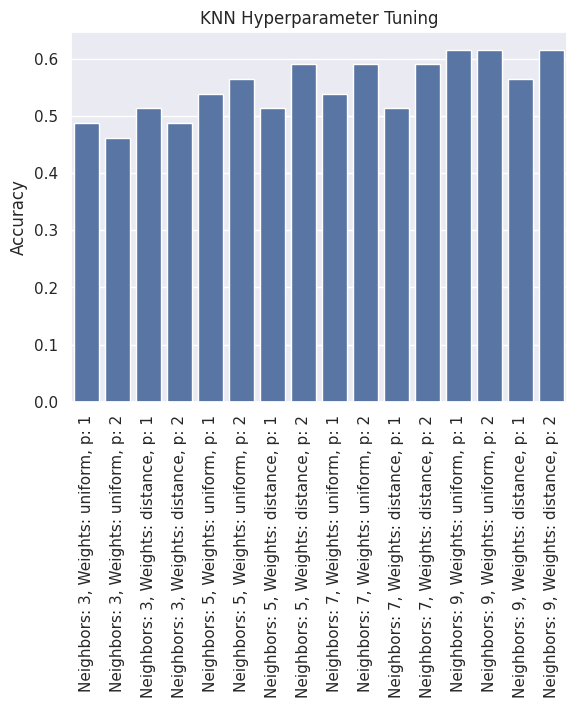

In [ ]:
# Hyperparameter options
n_neighbors_list = [3, 5, 7, 9]
weights_list = ["uniform", "distance"]
p_list = [1, 2]  # Manhattan (1) and Euclidean (2) distances

# Lists to store results
scores = []
params = []

# Iterate over hyperparameters
for n_neighbors in n_neighbors_list:
    for weights in weights_list:
        for p in p_list:
            try:
                # Define the model with current hyperparameters
                knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

                # Train the model
                knn.fit(X_train, y_train)

                # Make predictions
                y_pred = knn.predict(X_test)

                # Store parameters and accuracy
                params.append(f"Neighbors: {n_neighbors}, Weights: {weights}, p: {p}")
                acc = accuracy_score(y_test, y_pred)
                scores.append(acc)
            except Exception as e:
                print(f"Error with params: n_neighbors={n_neighbors}, weights={weights}, p={p}")
                print(e)
                continue

# Visualize the results
sns.barplot(x=params, y=scores).set_title('KNN Hyperparameter Tuning')
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()